In [3]:
#import libraries
%matplotlib inline                   

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [4]:
# this follows a procedure I found online in http://savvastjortjoglou.com/nba-draft-part01-scraping.html
url_da = "https://www.pgatour.com/stats/stat.102.2017.html"
url_gir = "https://www.pgatour.com/stats/stat.103.2017.html"
url_putts = "https://www.pgatour.com/stats/stat.119.2017.html"
url_scoring = "https://www.pgatour.com/stats/stat.120.2017.html"

# this is the html from the given urls
html_da = urlopen(url_da)
html_gir = urlopen(url_gir)
html_putts = urlopen(url_putts)
html_scoring = urlopen(url_scoring)

In [5]:
soup_da = BeautifulSoup(html_da)
soup_gir = BeautifulSoup(html_gir)
soup_putts = BeautifulSoup(html_putts)
soup_scoring = BeautifulSoup(html_scoring)

C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [6]:
column_headers_da = [th.getText() for th in 
                  soup_da.findAll('tr', limit=2)[1].findAll('th')]
column_headers_gir = [th.getText() for th in 
                  soup_gir.findAll('tr', limit=2)[1].findAll('th')]
column_headers_putts = [th.getText() for th in 
                  soup_putts.findAll('tr', limit=2)[1].findAll('th')]
column_headers_scoring = [th.getText() for th in 
                  soup_scoring.findAll('tr', limit=2)[1].findAll('th')]

In [7]:
data_rows_da = soup_da.findAll('tr')[2:]         # skip the first 2 header rows
data_rows_gir = soup_gir.findAll('tr')[2:] 
data_rows_putts = soup_putts.findAll('tr')[2:]
data_rows_scoring = soup_scoring.findAll('tr')[2:] 

player_data_da = [[td.getText() for td in data_rows_da[i].findAll('td')]
            for i in range(len(data_rows_da))]
player_data_gir = [[td.getText() for td in data_rows_gir[i].findAll('td')]
            for i in range(len(data_rows_gir))]
player_data_putts = [[td.getText() for td in data_rows_putts[i].findAll('td')]
            for i in range(len(data_rows_putts))]
player_data_scoring = [[td.getText() for td in data_rows_scoring[i].findAll('td')]
            for i in range(len(data_rows_scoring))]

In [8]:
df_da = pd.DataFrame(player_data_da, columns=column_headers_da)   #create DataFrames
df_da.head()


,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,%,FAIRWAYS HIT,POSSIBLE FAIRWAYS
0,\n 1,\n 1,\nRyan Armour\n,63,72.73,600,825
1,\n 2,\n 2,\nJim Furyk\n,54,72.07,511,709
2,\n 3,\n 3,\nBoo Weekley\n,75,71.67,731,"1,020"
3,\n 4,\n 4,\nChez Reavie\n,98,71.40,946,"1,325"
4,\n 5,\n 5,\nBrian Stuard\n,93,71.32,868,"1,217"


In [9]:
df_gir = pd.DataFrame(player_data_gir, columns=column_headers_gir)
df_gir.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,%,GREENS HIT,# HOLES,RELATIVE/PAR
0,\n 1,\n 1,\nMartin Flores\n,88,70.64,"1,030","1,458",-0.25
1,\n 2,\n 2,\nKyle Stanley\n,104,70.39,"1,267","1,800",-0.26
2,\n 3,\n 3,\nPaul Casey\n,94,70.06,"1,135","1,620",-0.27
3,\n 4,\n 4,\nJordan Spieth\n,85,70.01,983,"1,404",-0.34
4,\n 5,\n 5,\nRyan Armour\n,63,69.96,743,"1,062",-0.23


In [10]:
df_putts = pd.DataFrame(player_data_putts, columns=column_headers_putts)
df_putts.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,AVG,TOTAL PUTTS,TOTAL ROUNDS,LOW TOTAL PUTTS
0,\n 1,\n 1,\nWesley Bryan\n,95,28.13,"2,560",91,22
1,\n 2,\n 2,\nJonas Blixt\n,74,28.16,"1,971",70,24
2,\n 3,\n 3,\nGreg Chalmers\n,75,28.17,"2,000",71,22
3,\n 4,\n 4,\nDavid Lingmerth\n,79,28.20,"2,115",75,23
4,\n T5,\n T5,\nPhil Mickelson\n,85,28.25,"2,260",80,22


In [11]:
df_scoring = pd.DataFrame(player_data_scoring, columns=column_headers_scoring)
df_scoring.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,AVG,TOTAL STROKES,TOTAL ADJUSTMENT,TOTAL ROUNDS
0,\n 1,\n 1,\nJordan Spieth\n,85,68.846,"5,377",- 7.012,78
1,\n 2,\n 2,\nRickie Fowler\n,78,69.083,"5,287",- 36.726,76
2,\n 3,\n 3,\nJustin Thomas\n,86,69.359,"5,482",- 2.600,79
3,\n 4,\n 4,\nMarc Leishman\n,94,69.468,"6,269",- 16.894,90
4,\n 5,\n 5,\nPaul Casey\n,94,69.469,"6,270",- 17.811,90


In [12]:
df_scoring.rename(columns={'AVG':'AVG SCORE'},inplace=True)   #rename relevant columns
df_putts.rename(columns={'AVG':'AVG PUTTS'},inplace=True)

In [13]:
df_putts.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,AVG PUTTS,TOTAL PUTTS,TOTAL ROUNDS,LOW TOTAL PUTTS
0,\n 1,\n 1,\nWesley Bryan\n,95,28.13,"2,560",91,22
1,\n 2,\n 2,\nJonas Blixt\n,74,28.16,"1,971",70,24
2,\n 3,\n 3,\nGreg Chalmers\n,75,28.17,"2,000",71,22
3,\n 4,\n 4,\nDavid Lingmerth\n,79,28.20,"2,115",75,23
4,\n T5,\n T5,\nPhil Mickelson\n,85,28.25,"2,260",80,22


In [14]:
df_da.rename(columns={'%': 'PERCENT FAIRWAYS'}, inplace=True)    #rename relevant columns
df_gir.rename(columns={'%': 'PERCENT GIR'}, inplace=True)


In [15]:
df_gir.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,PERCENT GIR,GREENS HIT,# HOLES,RELATIVE/PAR
0,\n 1,\n 1,\nMartin Flores\n,88,70.64,"1,030","1,458",-0.25
1,\n 2,\n 2,\nKyle Stanley\n,104,70.39,"1,267","1,800",-0.26
2,\n 3,\n 3,\nPaul Casey\n,94,70.06,"1,135","1,620",-0.27
3,\n 4,\n 4,\nJordan Spieth\n,85,70.01,983,"1,404",-0.34
4,\n 5,\n 5,\nRyan Armour\n,63,69.96,743,"1,062",-0.23


In [16]:
df_da = df_da.drop(['RANK THIS WEEK','RANK LAST WEEK','FAIRWAYS HIT', 'POSSIBLE FAIRWAYS'],axis=1)   #Drop columns that aren't needed
df_da.head()

,PLAYER NAME,ROUNDS,PERCENT FAIRWAYS
0,\nRyan Armour\n,63,72.73
1,\nJim Furyk\n,54,72.07
2,\nBoo Weekley\n,75,71.67
3,\nChez Reavie\n,98,71.40
4,\nBrian Stuard\n,93,71.32


In [17]:
df_gir = df_gir.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','GREENS HIT', '# HOLES','RELATIVE/PAR'],axis=1)
df_gir.head()

,PLAYER NAME,PERCENT GIR
0,\nMartin Flores\n,70.64
1,\nKyle Stanley\n,70.39
2,\nPaul Casey\n,70.06
3,\nJordan Spieth\n,70.01
4,\nRyan Armour\n,69.96


In [18]:
df_putts = df_putts.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','TOTAL PUTTS', 'TOTAL ROUNDS','LOW TOTAL PUTTS'],axis=1)
df_putts.head()

,PLAYER NAME,AVG PUTTS
0,\nWesley Bryan\n,28.13
1,\nJonas Blixt\n,28.16
2,\nGreg Chalmers\n,28.17
3,\nDavid Lingmerth\n,28.20
4,\nPhil Mickelson\n,28.25


In [19]:
df_scoring = df_scoring.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','TOTAL STROKES', 'TOTAL ADJUSTMENT','TOTAL ROUNDS'],axis=1)
df_scoring.head()

,PLAYER NAME,AVG SCORE
0,\nJordan Spieth\n,68.846
1,\nRickie Fowler\n,69.083
2,\nJustin Thomas\n,69.359
3,\nMarc Leishman\n,69.468
4,\nPaul Casey\n,69.469


In [20]:
for i in range(len(df_da)):                       #Trying to fix the extracted player names to remove \n 
    df_da.iloc[i,0] = df_da.iloc[i,0][1:-1]
for i in range(len(df_gir)):
    df_gir.iloc[i,0] = df_gir.iloc[i,0][1:-1]
for i in range(len(df_putts)):
    df_putts.iloc[i,0] = df_putts.iloc[i,0][1:-1]
for i in range(len(df_scoring)):
    df_scoring.iloc[i,0] = df_scoring.iloc[i,0][1:-1]

In [21]:
df_da

,PLAYER NAME,ROUNDS,PERCENT FAIRWAYS
0,Ryan Armour,63,72.73
1,Jim Furyk,54,72.07
2,Boo Weekley,75,71.67
3,Chez Reavie,98,71.40
4,Brian Stuard,93,71.32
5,Francesco Molinari,75,70.14
6,William McGirt,89,69.96
7,Graeme McDowell,56,69.87
8,Zac Blair,105,69.70
9,Søren Kjeldsen,58,69.21


In [22]:
df_dd = pd.read_csv('Documents/driving_distance.csv',encoding='latin1')  #Import driving distance file I downloaded earlier
df_dd.head()

,PLAYER NAME,ROUNDS,AVG.,TOTAL DRIVES
0,\nRory McIlroy\n,51,317.2,88
1,\nDustin Johnson\n,77,315.0,132
2,\nBrandon Hagy\n,85,312.7,154
3,\nRyan Brehm\n,83,311.5,154
4,\nLuke List\n,102,311.5,196


In [23]:
df_dd = df_dd.drop(['TOTAL DRIVES','ROUNDS'], axis=1)  #Drop and rename columns as before

In [24]:
df_dd.rename(columns={'AVG.':'AVG DRIVE DIST'},inplace=True)

In [25]:
for i in range(len(df_dd)):
    df_dd.iloc[i,0] = df_dd.iloc[i,0][1:-1]   #Fix player names
df_dd.head()

,PLAYER NAME,AVG DRIVE DIST
0,Rory McIlroy,317.2
1,Dustin Johnson,315.0
2,Brandon Hagy,312.7
3,Ryan Brehm,311.5
4,Luke List,311.5


In [26]:
da_dict = df_da.set_index('PLAYER NAME').T.to_dict()  #create a dictionary
da_dict


{'Aaron\xa0Baddeley': {'PERCENT FAIRWAYS': '52.25', 'ROUNDS': '61'},
 'Adam\xa0Hadwin': {'PERCENT FAIRWAYS': '63.20', 'ROUNDS': '98'},
 'Adam\xa0Scott': {'PERCENT FAIRWAYS': '56.65', 'ROUNDS': '58'},
 'Alex\xa0Cejka': {'PERCENT FAIRWAYS': '67.19', 'ROUNDS': '85'},
 'Andres\xa0Gonzales': {'PERCENT FAIRWAYS': '55.75', 'ROUNDS': '73'},
 'Andrew\xa0Loupe': {'PERCENT FAIRWAYS': '45.93', 'ROUNDS': '55'},
 'Anirban\xa0Lahiri': {'PERCENT FAIRWAYS': '59.82', 'ROUNDS': '72'},
 'Ben\xa0Crane': {'PERCENT FAIRWAYS': '67.97', 'ROUNDS': '86'},
 'Ben\xa0Martin': {'PERCENT FAIRWAYS': '63.67', 'ROUNDS': '86'},
 'Billy\xa0Horschel': {'PERCENT FAIRWAYS': '60.07', 'ROUNDS': '88'},
 'Billy\xa0Hurley III': {'PERCENT FAIRWAYS': '60.57', 'ROUNDS': '80'},
 'Bill\xa0Haas': {'PERCENT FAIRWAYS': '59.27', 'ROUNDS': '92'},
 'Blayne\xa0Barber': {'PERCENT FAIRWAYS': '61.62', 'ROUNDS': '77'},
 'Boo\xa0Weekley': {'PERCENT FAIRWAYS': '71.67', 'ROUNDS': '75'},
 'Brad\xa0Fritsch': {'PERCENT FAIRWAYS': '56.40', 'ROUNDS': '5

In [27]:
dd_dict = df_dd.set_index('PLAYER NAME').T.to_dict()
gir_dict = df_gir.set_index('PLAYER NAME').T.to_dict()
putts_dict = df_putts.set_index('PLAYER NAME').T.to_dict()
scoring_dict = df_scoring.set_index('PLAYER NAME').T.to_dict()

In [28]:
dd_dict

{'Aaron\xa0Baddeley': {'AVG DRIVE DIST': 292.60000000000002},
 'Adam\xa0Hadwin': {'AVG DRIVE DIST': 291.30000000000001},
 'Adam\xa0Scott': {'AVG DRIVE DIST': 307.0},
 'Alex\xa0Cejka': {'AVG DRIVE DIST': 282.10000000000002},
 'Andres\xa0Gonzales': {'AVG DRIVE DIST': 299.19999999999999},
 'Andrew\xa0Loupe': {'AVG DRIVE DIST': 311.30000000000001},
 'Anirban\xa0Lahiri': {'AVG DRIVE DIST': 297.0},
 'Ben\xa0Crane': {'AVG DRIVE DIST': 278.5},
 'Ben\xa0Martin': {'AVG DRIVE DIST': 291.69999999999999},
 'Billy\xa0Horschel': {'AVG DRIVE DIST': 300.10000000000002},
 'Billy\xa0Hurley III': {'AVG DRIVE DIST': 276.89999999999998},
 'Bill\xa0Haas': {'AVG DRIVE DIST': 293.0},
 'Blayne\xa0Barber': {'AVG DRIVE DIST': 291.19999999999999},
 'Boo\xa0Weekley': {'AVG DRIVE DIST': 289.89999999999998},
 'Brad\xa0Fritsch': {'AVG DRIVE DIST': 288.30000000000001},
 'Branden\xa0Grace': {'AVG DRIVE DIST': 292.0},
 'Brandon\xa0Hagy': {'AVG DRIVE DIST': 312.69999999999999},
 'Brandt\xa0Snedeker': {'AVG DRIVE DIST': 28

In [29]:
for key in da_dict:                                            #combine dictionaries together, works by player name
    da_dict[key].update(dd_dict[key])
    da_dict[key].update(gir_dict[key])
    da_dict[key].update(putts_dict[key])
    da_dict[key].update(scoring_dict[key])

In [30]:
da_dict

{'Aaron\xa0Baddeley': {'AVG DRIVE DIST': 292.60000000000002,
  'AVG PUTTS': '28.49',
  'AVG SCORE': '71.483',
  'PERCENT FAIRWAYS': '52.25',
  'PERCENT GIR': '62.57',
  'ROUNDS': '61'},
 'Adam\xa0Hadwin': {'AVG DRIVE DIST': 291.30000000000001,
  'AVG PUTTS': '28.56',
  'AVG SCORE': '70.583',
  'PERCENT FAIRWAYS': '63.20',
  'PERCENT GIR': '65.08',
  'ROUNDS': '98'},
 'Adam\xa0Scott': {'AVG DRIVE DIST': 307.0,
  'AVG PUTTS': '29.36',
  'AVG SCORE': '69.996',
  'PERCENT FAIRWAYS': '56.65',
  'PERCENT GIR': '67.05',
  'ROUNDS': '58'},
 'Alex\xa0Cejka': {'AVG DRIVE DIST': 282.10000000000002,
  'AVG PUTTS': '29.51',
  'AVG SCORE': '71.461',
  'PERCENT FAIRWAYS': '67.19',
  'PERCENT GIR': '66.45',
  'ROUNDS': '85'},
 'Andres\xa0Gonzales': {'AVG DRIVE DIST': 299.19999999999999,
  'AVG PUTTS': '29.06',
  'AVG SCORE': '71.112',
  'PERCENT FAIRWAYS': '55.75',
  'PERCENT GIR': '67.71',
  'ROUNDS': '73'},
 'Andrew\xa0Loupe': {'AVG DRIVE DIST': 311.30000000000001,
  'AVG PUTTS': '29.63',
  'AVG SCO

In [31]:
total_dict = da_dict

In [32]:
df_total = pd.DataFrame(total_dict).T

In [33]:
df_total               #final version of the DataFrame

,AVG DRIVE DIST,AVG PUTTS,AVG SCORE,PERCENT FAIRWAYS,PERCENT GIR,ROUNDS
Aaron Baddeley,292.6,28.49,71.483,52.25,62.57,61
Adam Hadwin,291.3,28.56,70.583,63.20,65.08,98
Adam Scott,307,29.36,69.996,56.65,67.05,58
Alex Cejka,282.1,29.51,71.461,67.19,66.45,85
Andres Gonzales,299.2,29.06,71.112,55.75,67.71,73
Andrew Loupe,311.3,29.63,72.803,45.93,59.83,55
Anirban Lahiri,297,28.60,70.799,59.82,63.43,72
Ben Crane,278.5,29.13,71.091,67.97,65.68,86
Ben Martin,291.7,29.25,70.954,63.67,66.60,86
Billy Horschel,300.1,29.92,70.832,60.07,67.89,88


In [34]:
for i in range(len(df_total)):
    df_total.iloc[i,2] = np.float64(df_total.iloc[i,2])
print(type(df_total.iloc[0,2]))

<class 'numpy.float64'>


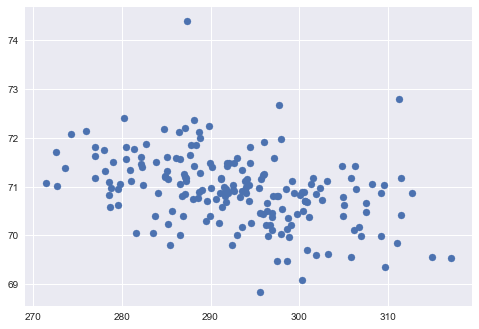

In [35]:
plt.scatter(df_total['AVG DRIVE DIST'], df_total['AVG SCORE'])         #scatter plot, shows some correlation by eyeball test
plt.show()


In [36]:
X = df_total['AVG DRIVE DIST'].values
Y = df_total['AVG SCORE'].values

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)


In [37]:
lreg = LinearRegression()
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
lreg.fit(X,Y)
Y_pred = lreg.predict(prediction_space)


In [38]:
lreg.score(X,Y)

0.16217747579335362

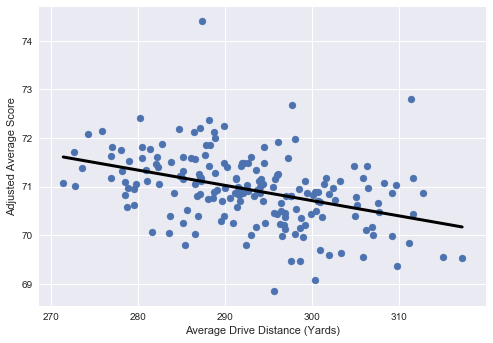

In [39]:
plt.plot(prediction_space,Y_pred, color='black', linewidth=3)
plt.scatter(df_total['AVG DRIVE DIST'], df_total['AVG SCORE'])            #Linear regression line, could create better model, maybe negelect far outliers
plt.xlabel('Average Drive Distance (Yards)')
plt.ylabel('Adjusted Average Score')
plt.show()
plt.savefig('Drive_Score.png')


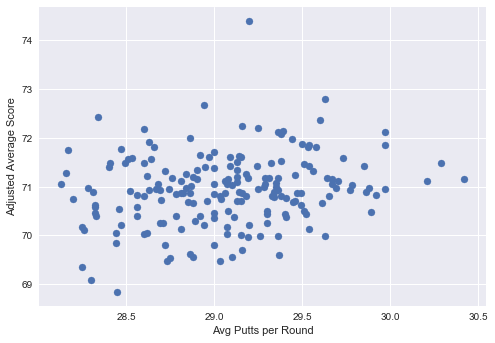

In [40]:
plt.scatter(df_total['AVG PUTTS'], df_total['AVG SCORE'])                   #clearly little correlation between score and average number of putts per round
plt.xlabel('Avg Putts per Round')
plt.ylabel('Adjusted Average Score')
plt.show()                  

In [41]:
for i in range(len(df_total)):
    df_total.iloc[i,4] = float(df_total.iloc[i,4])
df_total.iloc[0,4]

62.57

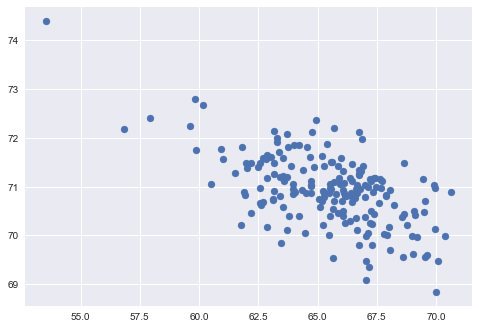

In [42]:
plt.scatter(df_total['PERCENT GIR'], df_total['AVG SCORE'])
plt.show()

In [43]:
X_1 = df_total['PERCENT GIR'].values
Y_1 = df_total['AVG SCORE'].values

X_1 = X_1.reshape(-1,1)
Y_1 = Y_1.reshape(-1,1)

In [44]:
(print(Y_1[0]))
print(Y[0])
print(X[0])
print(X_1[0])
float(df_total.iloc[0,4])

[71.483000000000004]
[71.483000000000004]
[292.60000000000002]
[62.57]


62.57

In [45]:
lreg_1 = LinearRegression()
prediction_space_1 = np.linspace(min(X_1), max(X_1)).reshape(-1,1)
lreg_1.fit(X_1,Y_1)
Y_pred_1 = lreg_1.predict(prediction_space_1)

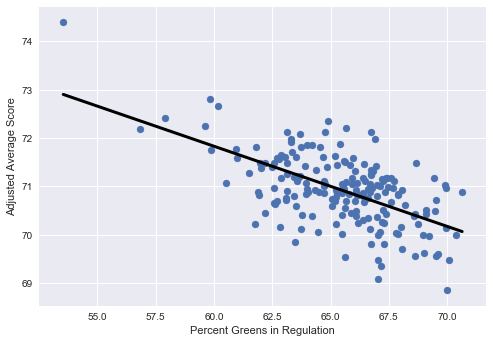

In [46]:
plt.plot(prediction_space_1,Y_pred_1, color='black', linewidth=3)
plt.scatter(df_total['PERCENT GIR'], df_total['AVG SCORE'])      #Linear regression model. Probably another function would fit this better 
plt.xlabel('Percent Greens in Regulation')
plt.ylabel('Adjusted Average Score')
plt.show()
plt.savefig('GIR_Score.png')

In [47]:
lreg_1.score(X_1,Y_1)

0.35194698229849053

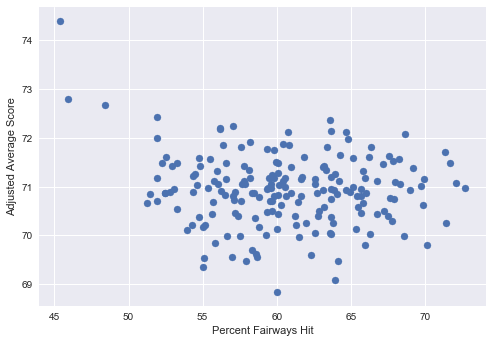

In [48]:
plt.scatter(df_total['PERCENT FAIRWAYS'], df_total['AVG SCORE'])#driving accuracy doesn't appear to have much correlation with score
plt.xlabel('Percent Fairways Hit')
plt.ylabel('Adjusted Average Score')
plt.show()

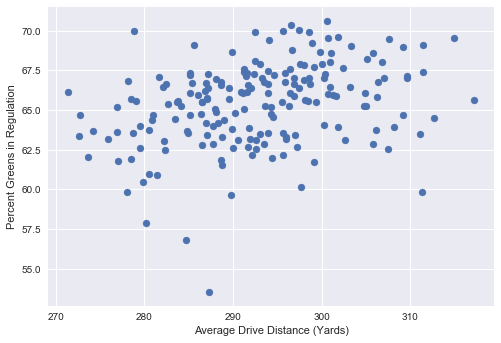

In [49]:
plt.scatter(df_total['AVG DRIVE DIST'], df_total['PERCENT GIR'])    #does driving distance correlate with Percent GIR? 
plt.xlabel('Average Drive Distance (Yards)')
plt.ylabel('Percent Greens in Regulation')
plt.show()